In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv("res/boston_house.csv")
df=df.interpolate()
df.rename(columns={'MEDV':'Target'},inplace=True)
x = pd.DataFrame(np.array(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]))
y = pd.DataFrame(np.array(df['Target']))

In [65]:
# trian test splite
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#fitting the data
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [68]:
lasso=Lasso()

In [69]:
parameters={'alpha':[1,2,5,10,20,50,100]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [70]:
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [71]:
print(lassocv.best_params_)
print(lassocv.best_score_)
print(lassocv.best_estimator_)

{'alpha': 1}
-29.49640737047796
Lasso(alpha=1)


In [72]:
predict=lassocv.predict(x_test)

In [73]:
from sklearn.metrics import r2_score
r2_score=r2_score(predict,y_test)

print('R2 Score:',r2_score)

R2 Score: 0.3186642087016749


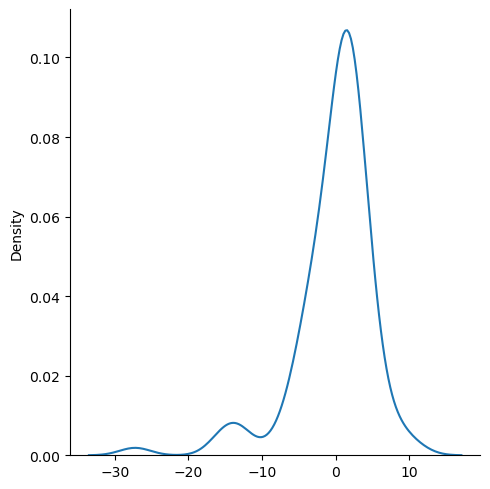

In [74]:
sns.displot(predict - y_test.values.flatten(), kind='kde')